In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def polybase(x,grado):
    b = np.zeros((len(x),grado+1))
    for i in range(grado+1):
        b[:,i] = np.power(x,i)
    return b

# Cuadrados mínimos lineales

Primero un ejemplo sintético en 1 dimensión donde se generan datos aleatorio y se hace el ajuste despejando de la ecuación normal.

$ y \sim \beta X + ϵ$

X es la variable independiente, y la dependiente y $\beta$ son los coeficientes de la regresión a buscar.

X tiene la última columna con todos 1s para poder ajustar el término independiente.

[[0.26551159 0.10854853]]


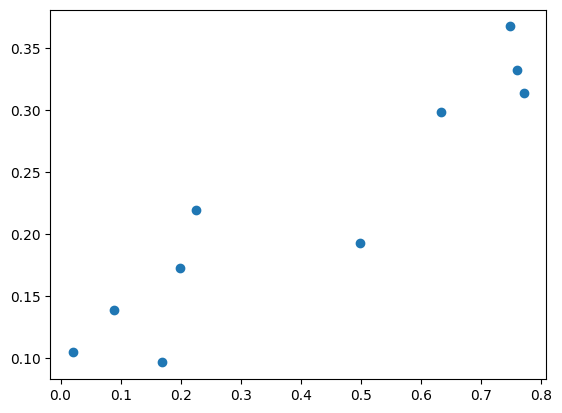

In [3]:

np.random.seed(10)
N = 10
M = 1

# datos independientes

X = np.random.rand(N,M) # X es de 10 x 1, es un vector columna

# pendiente y ordenada al origen aleatorios
beta = np.random.randn(1,M+1) # ojo que esto es un vector fila, osea, seria como beta.T = (m, b)

# se agrega una columna de unos
# la primera columna evalua a los datos con la funcion id, f(x) = x, la 2da con f(x) = 1
X = np.c_[X, np.ones(N)]

# creamos los datos dependientes
# ya conocemos la solucion beta, y le agregamos una perturbacion, para que no
# exista una solucion exacta...
y = (beta@X.T).T + np.random.randn(N,1)*0.05


plt.plot(X[:,0], y,'o')
print(beta)

Encontramos los coeficientes con

$$\beta=(X^tX)^{-1}X^ty$$

In [4]:
beta_pred = np.linalg.inv(X.T@X)@X.T@y
print(beta_pred)

[[0.30427249]
 [0.09860911]]


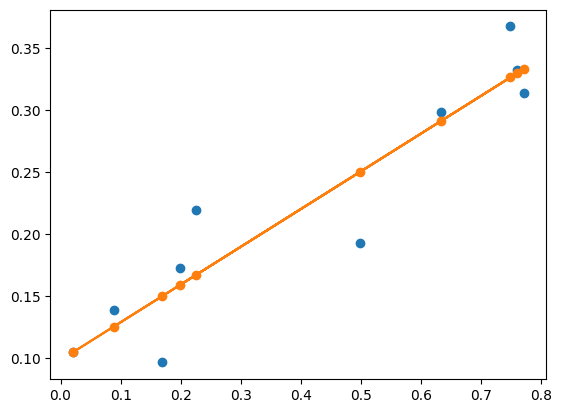

In [5]:
y_pred = X@beta_pred
plt.plot(X[:,0], y,'o')
plt.plot(X[:,0], y_pred,'o-');

Computamos el error:

In [6]:
ECM = np.sum((y_pred-y)**2)
ECM

0.011446264032394736

## Sobreajuste

Repetimos el procedimiento pero vamos a generar datos de validación y ver el error ahí

Encontramos la solución con 3 métodos. Vamos a usar el de SVD porque es el más fácil teoricamente. Colab manda mucha fruta con los tiempos.

[[-1.0616544  -0.68448467]]


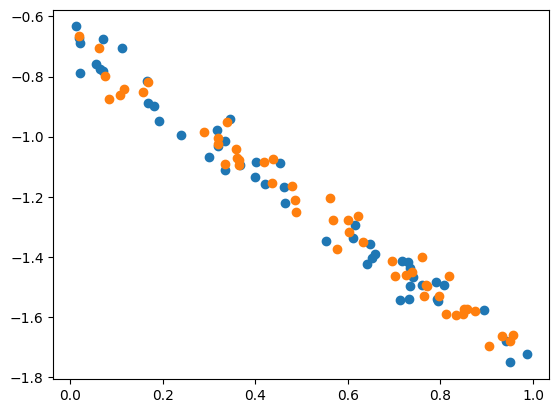

In [8]:
np.random.seed(11)
N = 100
M = 1

# datos independientes
X = np.random.rand(N,M)

# pendiente y ordenada al origen aleatorios
beta = np.random.randn(1,M+1)

# se agrega una columna de unos
X = np.c_[X, np.ones(N)]
# print(X,"\n", X.shape,"\n")

# separamos los datos en ajuste y validación intercalados
X_ajuste = X[::2]
X_val = X[1::2]
# ya que X es array de arrays (matriz), al hacer el split, estamos intercalando
# los elementos de X, osea las filas de la matriz.

# print(X_ajuste,"\n",X_ajuste.shape, "\n")
# print(X_val, "\n", X_val.shape)

# creamos los datos dependientes
y = (beta@X.T).T + np.random.randn(N,1)*0.05

y_ajuste = y[::2]
y_val = y[1::2]
# el slicing aca es mas directo, ya que y es solo un vector, no matriz.

plt.plot(X_ajuste[:,0], y_ajuste,'o')
plt.plot(X_val[:,0], y_val,'o')

print(beta)

In [9]:
beta_pred = np.linalg.inv(X_ajuste.T@X_ajuste)@X_ajuste.T@y_ajuste
print(beta_pred)

[[-1.07377003]
 [-0.68062957]]


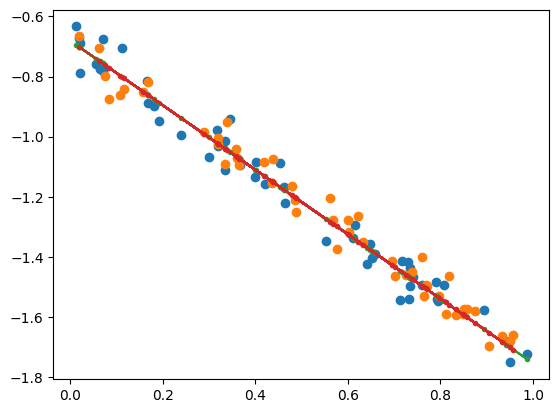

In [11]:
y_ajuste_pred = (beta_pred.T@X_ajuste.T).T
y_val_pred = (beta_pred.T@X_val.T).T


plt.plot(X_ajuste[:,0], y_ajuste,'o')
plt.plot(X_val[:,0], y_val,'o')

plt.plot(X_ajuste[:,0], y_ajuste_pred,'.-');
plt.plot(X_val[:,0], y_val_pred,'.-');

In [12]:
ECM_ajuste = np.sum((y_ajuste_pred - y_ajuste)**2)
ECM_val = np.sum((y_val_pred - y_val)**2)
ECM_ajuste, ECM_val

(0.11646168617160639, 0.098996235843524)

# **EJERCICIO 1**

Calcular el error relativo de sobreajuste $\displaystyle \frac{ECM_{val}-ECM_{ajuste}}{ECM_{ajuste}}$ en función de la dimensionalidad $M$ del problema. Recordar N>M. Comparar los resultados con la función *scipy.linalg.lstsq*. Analizar porqué la solución tomando la inversa $(X^TX)^{-1}$ no es tan bueno.

In [13]:
error_relaivo = (ECM_val - ECM_ajuste)/ECM_ajuste
print(error_relaivo) # idealmene, deberia ser 0.

-0.14996734893866326


In [14]:
# comparemos con una solcion la solucion de python con lstsq
beta_pred_py = np.linalg.lstsq(X_ajuste, y_ajuste)[0] # el [0], ya que retorna tupla de cosas.


print("beta_pred_py \n", beta_pred_py)
print("beta_pred \n", beta_pred)

beta_pred_py 
 [[-1.07377003]
 [-0.68062957]]
beta_pred 
 [[-1.07377003]
 [-0.68062957]]


/tmp/ipykernel_12674/2293464182.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_pred_py = np.linalg.lstsq(X_ajuste, y_ajuste)[0] # el [0], ya que retorna tupla de cosas.


## Polinomios

Base de monomios $\{1,x,x^2, \cdots, x^n\}$

(100, 8)


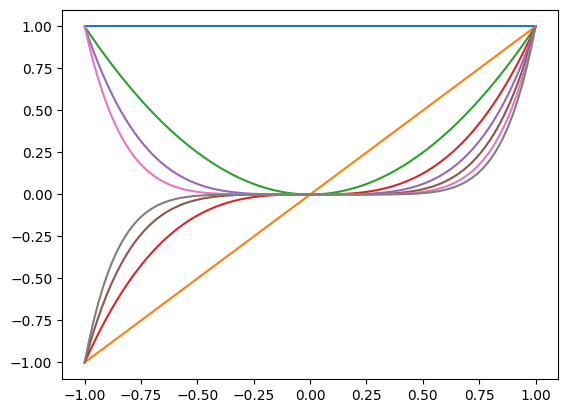

In [16]:
N = 100
grado = 7
x = np.linspace(-1,1,N)
X = polybase(x, grado)
print(X.shape)

# poner una matriz en la y de la funcion es como representar varias funciones,
# varias imagenes, una por cada columa de la matriz.
plt.plot(x, X);

Base de polinomios de Legendre $\{P_0(x),P_1(x),\cdots,P_n(x)\}$

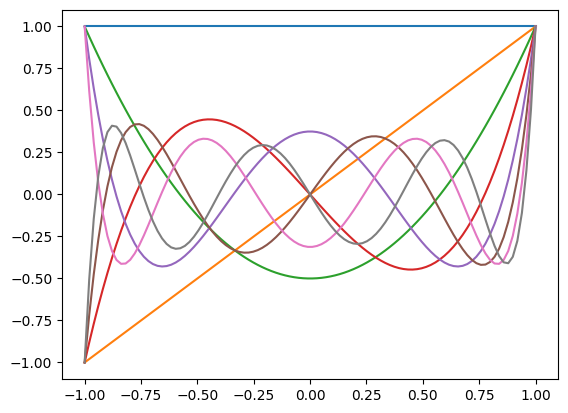

In [17]:
N = 100
grado = 7
x = np.linspace(-1,1,N)
X = np.polynomial.legendre.legvander(x, grado)
plt.plot(x, X);

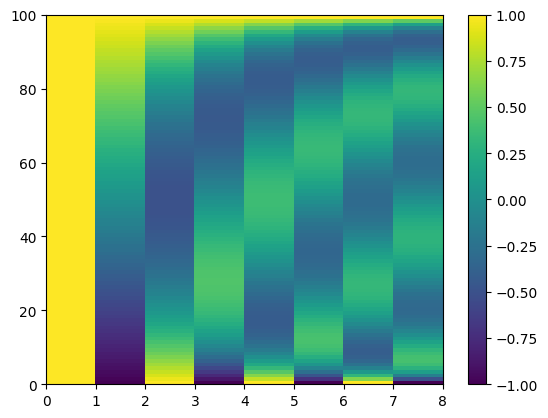

In [25]:
X = np.polynomial.legendre.legvander(x, grado)
plt.pcolor(X)
plt.colorbar()

# print(X)

Comparemos el número de condición de los monomios y el de los polinomios de Legendre

In [26]:
grado = 5
x = np.linspace(-1,1,100)

X = polybase(x, grado)
print(np.linalg.cond(X.T@X))

X = np.polynomial.legendre.legvander(x, grado)
print(np.linalg.cond(X.T@X))

1757.2331911449346
10.149097946075813


Ajustemos con estos polinomios una función arbitraria con oscilaciones



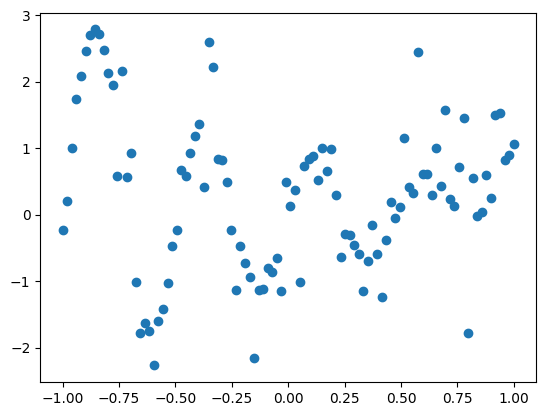

In [29]:
np.random.seed(34)
x = np.linspace(-1,1,100)

y = np.sin(x*2.0)*x**5+np.sin(x*13.0)*np.exp(-1.0*x) + (np.random.rand(len(x))>0.5)*np.random.randn(len(x))*0.8
# y = np.sin(x*2.0)*x**5+np.sin(x*13.0)*np.exp(-1.0*x) 

plt.plot(x,y,'o');

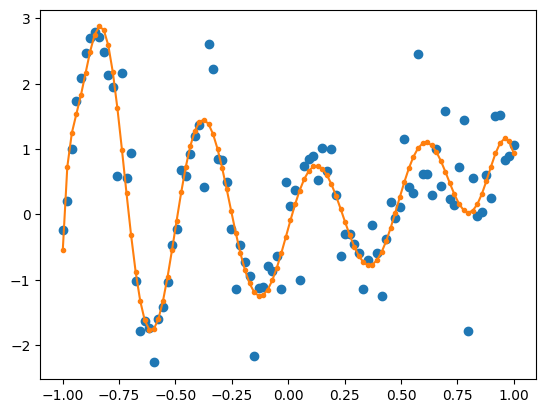

In [30]:
grado = 14
X = np.polynomial.legendre.legvander(x, grado)
beta_pred = np.linalg.inv(X.T@X)@X.T@y

y_pred = X@beta_pred
plt.plot(x,y,'o');
plt.plot(x,y_pred,'.-');

# **EJERCICIO 2**

Explorar el grado y encontrar el valor que minimiza el ECM. Repetir separando los datos en ajuste y validación y encontrar el que minimiza el error de validación. Hacer un gráfico del $ECM_{val}$ en función del grado.  Comparar los resultados con la función *scipy.linalg.lstsq*. Analizar porqué la solución tomando la inversa $(X^TX)^{-1}$ no es tan bueno.



In [ ]:
# 

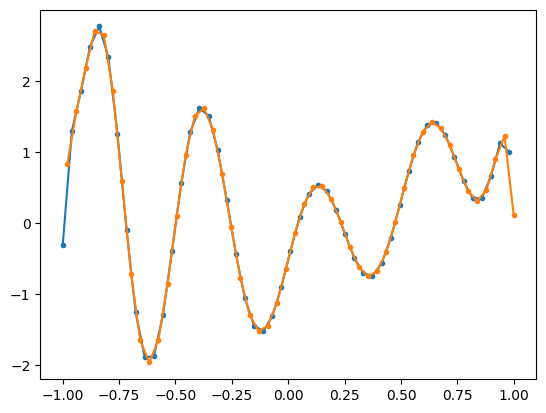

In [37]:
X_ajuste = X[::2]
X_val = X[1::2]

y_ajuste = y[::2]
y_val = y[1::2]

beta_pred = np.linalg.inv(X_ajuste.T@X_ajuste)@(X_ajuste.T)@y_ajuste

y_ajuste_pred = (beta_pred.T@X_ajuste.T).T
y_val_pred = (beta_pred.T@X_val.T).T

# dibujamos los puntos, provienen de la funcion generada (con interferencia)
# plt.plot(x[::2], y_ajuste,'o')
# plt.plot(x[1::2], y_val,'o')

# dibujamos las predicciones (funciones)
plt.plot(x[::2], y_ajuste_pred,'.-');
plt.plot(x[1::2], y_val_pred,'.-');

In [ ]:
ECM_ajuste = np.sum((y_ajuste_pred-y_ajuste)**2)
ECM_val = np.sum((y_val_pred-y_val)**2)
ECM_ajuste, ECM_val

(11.8616221770296, 23.233771709963868)